# 경희대 인근 지역 부동산 분석

In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from openpyxl import Workbook


def get_info(dong, house, rent):
    if dong == 'seocheon':
        lat1 = '37.23374200980421'
        lat2 = '37.24306457891163'
        lng1 = '127.07149097828014'
        lng2 = '127.08953251144348'
        lat = '37.23840364042514'
        lng = '127.08051118978092'   
        dname = '4146311000'
    elif dong == 'youngtong':
        lat1 = '37.24579853512842'
        lat2 = '37.25512121740087'
        lng1 = '127.07060069665792'
        lng2 = '127.08952051988784'
        lat = '37.26637204740505'
        lng = '127.08049586011771'
        dname = '4111710500'
    if house == 'oneroom':
        ctg = 'ONE'
    elif house == 'house':
        ctg = 'HOU'
    if rent == 'lease':
        code = '2'
        n = 1
    elif rent == 'monthly':
        code = '4'
        n = 2
    url = 'http://www.serve.co.kr/map_new/index.asp?tflag=maemul&category1=' + ctg + '&goodtype_code=' + code + '&searchflag=&space1=0&space2=0&price1=0&price2=0&floor=&room=&familycnt=&lat1=' + lat1 +'&lat2=' + lat2 + '&lng1=' + lng1 + '&lng2=' + lng2 + '&map_level=4&center_lat=' + lat + '&center_lng=' + lng +'&sortType=&sortType2=asc&law_dnameno=' + dname
    
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    options.add_argument("disalbe-gpu")
    
    driver = webdriver.Chrome('C:/Users/tjswn/Downloads/chromedriver_win32/chromedriver.exe', options = options)
    driver.get(url)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 매물 개수
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    num_html = soup.select('.txt > a > span')
    num = num_html[n].text
    num = int(num)
    
    # 엑셀 파일
    wb = Workbook()
    ws = wb.active
    ws.append(['dong', '매물번호', '등록일', '가격', '층', '방수', '욕실수', '복층/단층', '중개수수료'])
    
    i = 0
    while(i < num):
        try:
            row = []
            row.append(dong)
            xpath = '//*[@id="maemul_list"]/div[1]/div/ul/li['  + str(i + 1) + ']/a' 
            driver.find_element_by_xpath(xpath).click()
            i = i + 1
        except:
            num = num + 1
            i = i + 1
            continue
        
        # 최근 열린 탭을 활성탭으로 변경
        driver.switch_to.window(driver.window_handles[-1])
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        td = soup.select('.wrap_table > table > tbody > tr > td')
        th = soup.select('.wrap_table > table > tbody > tr > th')
        p = soup.select('.article_summary > div > div > p')
        for j in range(len(th)):
            tmp = th[j].text.strip()
            th[j] = tmp
        
        em = p[1].text.strip()
        
        index = em.find("매물번호 :")
        end = em.find("|")
        id = em[index + 7 : end]
        row.append(id)
        
        index = em.find("등록일:")
        date = em[index + 4:]
        row.append(date)

        try:
            if rent == 'lease':
                index = th.index('전세가')                    
                price = td[index].text.strip()
                row.append(price)
            elif rent == 'monthly':
                index = th.index('월세')
                price = td[index].text.strip()
                price += '/'
                index = th.index('보증금')
                price += td[index].text.strip()
                row.append(price)
        except ValueError:
            row.append(0)
                
        try:
            index = th.index('해당층')
            floor = td[index].text.strip()
            row.append(floor)
        except ValueError:
            row.append(0)
                
        try:
            index = th.index('방수')
            room = td[index].text.strip()         
            row.append(room)
        except ValueError:
            row.append(0)
                
        try:
            index = th.index('욕실수')
            bath = td[index].text.strip()
            row.append(bath)               
        except ValueError:
            row.append(0)
                
        try:
            index = th.index('복층')
            splt = td[index].text.strip()
            row.append(splt)
        except ValueError:
            row.append(0)
                
        try:
            index = th.index('비용정보')
            commssn = td[index].select('span')[0].text.strip()
            row.append(commssn)
        except ValueError:
            row.append(0)
        
        print(row)        
        ws.append(row)

        
        driver.close()
        # 맨 처음 탭을 활성탭으로 변경
        driver.switch_to.window(driver.window_handles[0])
    
    wb.save(dong + '_' + house + '_' + rent + '.xlsx')
    driver.close()

In [ ]:
get_info('seocheon', 'house', 'lease')
get_info('seocheon', 'house', 'monthly')
get_info('seocheon', 'oneroom', 'lease')
get_info('seocheon', 'oneroom', 'monthly')
get_info('youngtong', 'house', 'lease')
get_info('youngtong', 'house', 'monthly')
get_info('youngtong', 'oneroom', 'lease')
get_info('youngtong', 'oneroom', 'monthly')

['seocheon', '260546729', '2019-11-28', '15,000만원', '3층', '3개', '2개', '단층', '450,000원']
['seocheon', '260546728', '2019-11-28', '18,000만원', '3층', '3개', '2개', '단층', '540,000원']
['seocheon', '260546727', '2019-11-28', '16,000만원', '3층', '3개', '1개', '단층', '480,000원']
['seocheon', '260546724', '2019-11-28', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '260546723', '2019-11-28', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '260546721', '2019-11-28', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '260546720', '2019-11-28', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '260546718', '2019-11-28', '11,000만원', '2층', '2개', 0, '단층', '330,000원']
['seocheon', '260518966', '2019-11-27', '15,000만원', '3층', '3개', '2개', '단층', '450,000원']
['seocheon', '260518963', '2019-11-27', '18,000만원', '3층', '3개', '2개', '단층', '540,000원']
['seocheon', '260518962', '2019-11-27', '16,000만원', '3층', '3개', '1개', '단층', '480,000원']
['seocheon', '260518958', '2019-11-27', '14,000

['seocheon', '259975481', '2019-11-05', '15,000만원', '4층', '2개', '1개', '단층', '450,000원']
['seocheon', '259975479', '2019-11-05', '18,000만원', '3층', '3개', '2개', '단층', '540,000원']
['seocheon', '259975478', '2019-11-05', '16,000만원', '3층', '3개', '1개', '단층', '480,000원']
['seocheon', '259975473', '2019-11-05', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259975472', '2019-11-05', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259975470', '2019-11-05', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '259975469', '2019-11-05', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '259975468', '2019-11-05', '11,000만원', '2층', '2개', 0, '단층', '330,000원']
['seocheon', '259938687', '2019-11-04', '15,000만원', '4층', '2개', '1개', '단층', '450,000원']
['seocheon', '259938685', '2019-11-04', '18,000만원', '3층', '3개', '2개', '단층', '540,000원']
['seocheon', '259938684', '2019-11-04', '16,000만원', '3층', '3개', '1개', '단층', '480,000원']
['seocheon', '259938679', '2019-11-04', '14,000

['seocheon', '259595074', '2019-10-21', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259595070', '2019-10-21', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259595065', '2019-10-21', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '259595063', '2019-10-21', '12,000만원', '2층', '2개', '1개', '단층', '360,000원']
['seocheon', '259595062', '2019-10-21', '11,000만원', '2층', '2개', 0, '단층', '330,000원']
['seocheon', '259568849', '2019-10-19', '21,000만원', '4층', '3개', '2개', '단층', '630,000원']
['seocheon', '259568846', '2019-10-19', '15,000만원', '4층', '2개', '1개', '단층', '450,000원']
['seocheon', '259568844', '2019-10-19', '18,000만원', '3층', '3개', '2개', '단층', '540,000원']
['seocheon', '259568843', '2019-10-19', '16,000만원', '3층', '3개', '1개', '단층', '480,000원']
['seocheon', '259568840', '2019-10-19', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259568839', '2019-10-19', '14,000만원', 0, '2개', 0, '단층', '420,000원']
['seocheon', '259568838', '2019-10-19', '12,000만원', '2층', '

['seocheon', '259800973', '2019-10-29', '60만원/3,000만원', '4층', '3개', '1개', '단층', '300,000원']
['seocheon', '259800970', '2019-10-29', '60만원/1,000만원', '2층', '2개', '1개', '단층', '280,000원']
['seocheon', '259765490', '2019-10-28', '70만원/3,000만원', 0, '4개', '2개', '단층', '300,000원']
['seocheon', '259765483', '2019-10-28', '60만원/3,000만원', '4층', '3개', '1개', '단층', '300,000원']
['seocheon', '259765472', '2019-10-28', '60만원/1,000만원', '2층', '2개', '1개', '단층', '280,000원']
['seocheon', '259715794', '2019-10-25', '70만원/3,000만원', 0, '4개', '2개', '단층', '300,000원']
['seocheon', '259715792', '2019-10-25', '60만원/3,000만원', '4층', '3개', '1개', '단층', '300,000원']
['seocheon', '259715788', '2019-10-25', '60만원/1,000만원', '2층', '2개', '1개', '단층', '280,000원']
['seocheon', '259697693', '2019-10-24', '50만원/1,000만원', '3층', 0, '1개', '단층', '240,000원']
['seocheon', '259659903', '2019-10-23', '70만원/3,000만원', 0, '4개', '2개', '단층', '300,000원']
['seocheon', '259659901', '2019-10-23', '60만원/3,000만원', '4층', '3개', '1개', '단층', '300,000원']


['seocheon', '259568835', '2019-10-19', '55만원/1,000만원', '3층', 0, 0, '단층', '260,000원']
['seocheon', '259568834', '2019-10-19', '50만원/1,000만원', '2층', '1개', 0, '단층', '240,000원']
['seocheon', '259539008', '2019-10-18', '55만원/1,000만원', '3층', 0, 0, '단층', '260,000원']
['seocheon', '259539007', '2019-10-18', '50만원/1,000만원', '2층', '1개', 0, '단층', '240,000원']
['seocheon', '259504642', '2019-10-17', '55만원/1,000만원', '3층', 0, 0, '단층', '260,000원']
['seocheon', '259504639', '2019-10-17', '50만원/1,000만원', '2층', '1개', 0, '단층', '240,000원']
['seocheon', '259489787', '2019-10-16', '55만원/1,000만원', '3층', '1개', '1개', '단층', '260,000원']
['seocheon', '259487556', '2019-10-16', '55만원/1,000만원', '3층', 0, 0, '단층', '260,000원']
['seocheon', '259487555', '2019-10-16', '50만원/1,000만원', '2층', '1개', 0, '단층', '240,000원']
['seocheon', '259423591', '2019-10-12', '35만원/500만원', '2층', '1개', 0, '단층', '147,500원']
['seocheon', '259421177', '2019-10-12', '35만원/500만원', '2층', '1개', 0, '단층', '147,500원']
['seocheon', '259388802', '2019-10

['youngtong', '259969891', '2019-11-05', '40만원/300만원', '1층', '1개', '1개', '단층', '155,000원']
['youngtong', '259972514', '2019-11-05', '10만원/8,000만원', '2층', '2개', '1개', '단층', '300,000원']
['youngtong', '259934535', '2019-11-04', '32만원/300만원', '2층', '1개', '1개', '단층', '127,000원']
['youngtong', '259934550', '2019-11-04', '28만원/200만원', '1층', '1개', '1개', '단층', '108,000원']
['youngtong', '259965395', '2019-11-04', '10만원/6,500만원', '3층', '2개', '1개', '단층', '300,000원']
['youngtong', '259966573', '2019-11-04', '37만원/300만원', '1층', '1개', '1개', '단층', '144,500원']
['youngtong', '259953066', '2019-11-04', '25만원/200만원', '-1층', '1개', '1개', '단층', '97,500원']
['youngtong', '259952300', '2019-11-04', '50만원/1,000만원', '8층', '1개', '1개', '단층', '240,000원']
['youngtong', '259950328', '2019-11-04', '36만원/500만원', '2층', '1개', 0, '단층', '151,000원']
['youngtong', '259949388', '2019-11-04', '42만원/500만원', '4층', '1개', '1개', '단층', '172,000원']
['youngtong', '259934209', '2019-11-04', '35만원/300만원', '2층', '1개', '1개', '단층', '137,500

In [ ]:
from pandas import ExcelWriter
import pandas as pd

excels = ['seocheon_house_lease.xlsx', 'seocheon_house_monthly.xlsx', 'seocheon_oneroom_lease.xlsx', 'seocheon_oneroom_monthly.xlsx', 'youngtong_house_lease.xlsx', 'youngtong_house_monthly.xlsx', 'youngtong_oneroom_lease.xlsx', 'youngtong_oneroom_monthly.xlsx']
data_sheets = ['seocheon_house_lease', 'seocheon_house_monthly', 'seocheon_oneroom_lease', 'seocheon_oneroom_monthly', 'youngtong_house_lease', 'youngtong_house_monthly', 'youngtong_oneroom_lease', 'youngtong_oneroom_monthly']

# data.xlsx에 시트별로 저장
file = 'data.xlsx'
writer = ExcelWriter(file)
for i in range(len(data_sheets)):
    data = pd.read_excel(excels[i])
    data.to_excel(writer, data_sheets[i])

# all sheet에 모든 시트 모아서 저장
df1 = pd.read_excel(file, sheet_name = data_sheets[0])
tmp = []
for i in range(len(df1)):
    tmp.append('lease')
df1['임대'] = tmp
df2 = pd.read_excel(file, sheet_name = data_sheets[1])
tmp = []
for i in range(len(df2)):
    tmp.append('monthly')
df2['임대'] = tmp
df3 = pd.read_excel(file, sheet_name = data_sheets[2])
tmp = []
for i in range(len(df3)):
    tmp.append('lease')
df3['임대'] = tmp
df4 = pd.read_excel(file, sheet_name = data_sheets[3])
tmp = []
for i in range(len(df4)):
    tmp.append('monthly')
df4['임대'] = tmp
df5 = pd.read_excel(file, sheet_name = data_sheets[4])
tmp = []
for i in range(len(df5)):
    tmp.append('lease')
df5['임대'] = tmp
df6 = pd.read_excel(file, sheet_name = data_sheets[5])
tmp = []
for i in range(len(df6)):
    tmp.append('monthly')
df6['임대'] = tmp
df7 = pd.read_excel(file, sheet_name = data_sheets[6])
tmp = []
for i in range(len(df7)):
    tmp.append('lease')
df7['임대'] = tmp
df8 = pd.read_excel(file, sheet_name = data_sheets[7])
tmp = []
for i in range(len(df8)):
    tmp.append('monthly')
df8['임대'] = tmp
df9 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

df9.to_excel(writer, 'all')

writer.save()

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name = 'seocheon_house_lease')
data

,동,매물번호,등록일,가격,층,방수,욕실수,복층/단층,중개수수료
0,seocheon,260546729,2019-11-28,"15,000만원",3층,3개,2개,단층,"450,000원"
1,seocheon,260546728,2019-11-28,"18,000만원",3층,3개,2개,단층,"540,000원"
2,seocheon,260546727,2019-11-28,"16,000만원",3층,3개,1개,단층,"480,000원"
3,seocheon,260546724,2019-11-28,"14,000만원",0,2개,0,단층,"420,000원"
4,seocheon,260546723,2019-11-28,"14,000만원",0,2개,0,단층,"420,000원"
5,seocheon,260546721,2019-11-28,"12,000만원",2층,2개,1개,단층,"360,000원"
6,seocheon,260546720,2019-11-28,"12,000만원",2층,2개,1개,단층,"360,000원"
7,seocheon,260546718,2019-11-28,"11,000만원",2층,2개,0,단층,"330,000원"
8,seocheon,260518966,2019-11-27,"15,000만원",3층,3개,2개,단층,"450,000원"
9,seocheon,260518963,2019-11-27,"18,000만원",3층,3개,2개,단층,"540,000원"


In [ ]:
import win32com.client as win32

data_sheets = ['seocheon_house_lease', 'seocheon_house_monthly', 'seocheon_oneroom_lease', 'seocheon_oneroom_monthly', 'youngtong_house_lease', 'youngtong_house_monthly', 'youngtong_oneroom_lease', 'youngtong_oneroom_monthly','all']

excel = win32.Dispatch("Excel.Application")
excel.Visible = True

excel1 = excel.Workbooks.Open('C:/Users/tjswn/Documents/2017110263 선혜주/data.xlsx')
                              
for i in range(len(data_sheets)):
    sheet = excel1.Worksheets(data_sheets[i])
    j = 2
    while sheet.Cells(j, 1).Value != None:
        # 가격
        price = sheet.Cells(j, 5).Value
        if (price.find('/') == -1):
            #전세
            idx = price.find('만원')
            price = price[:idx]
            idx = price.find(',')
            price = price[:idx] + price[idx + 1:]
            price = int(price)
            price *= 10000
        else:
            #월세
            idx = price.find('/')
            idx2 = price.find('만원', idx)
            mon = price[:idx - 2]
            dep = price[idx + 1 : idx2]
            if (dep.find(',') != -1):
                idx = dep.find(',')
                dep = dep[:idx] + dep[idx + 1:]
            dep = int(dep)
            dep *= 10000
            mon = int(mon)
            mon *= 10000
            if (i != 8):
                sheet.Cells(1, 12).Value = '월세'
                sheet.Cells(1, 13).Value = '보증금'
                sheet.Cells(j, 12).Value = mon
                sheet.Cells(j, 13).Value = dep
            else:
                sheet.Cells(1, 13).Value = '월세'
                sheet.Cells(1, 14).Value = '보증금'
                sheet.Cells(j, 13).Value = mon
                sheet.Cells(j, 14).Value = dep

            # 월세를 전세로 환산 : 보증금 + 월세 * 100
            price = '0'
            price = int(price)
            price = dep + mon * 100
        sheet.Cells(j, 5).Value = price
    
        #중개수수료
        price = sheet.Cells(j, 10).Value
        idx = price.find('원')
        price = price[:idx]
        while (price.find(',') != -1) :
            idx = price.find(',')
            price = price[:idx] + price[idx + 1:]
        price = int(price)
        sheet.Cells(j, 10).Value = price
        
        # 층
        floor = sheet.Cells(j, 6).Value
        if (floor != 0):
            idx = floor.find('층')
            floor = floor[:idx]
        sheet.Cells(j, 6).Value = floor
        
        # 방수
        room = sheet.Cells(j, 7).Value
        if (room != 0):
            idx = room.find("개")
            room = room[:idx]
        sheet.Cells(j, 7).Value = room
            
        # 욕실수
        bath = sheet.Cells(j, 8).Value
        if (bath != 0):
            idx = bath.find("개")
            bath = bath[:idx]
        sheet.Cells(j, 8).Value = bath
        
        # 등록일
        date = sheet.Cells(j, 4).Value
        idx = date.find("-")
        idx2 = date.find("-", 6)
        tmp = date[idx + 1 : idx2]
        date = tmp + date[idx2 + 1:]
        date = float(date)
        date /= 100
        sheet.Cells(j, 4).Value = date
        
        # 단/복층
        # 단층: 0, 복층: 1
        storied = sheet.Cells(j, 9).Value
        if (storied == '단층'):
            sheet.Cells(j, 9).Value = 0
        elif (storied == '복층'):
            sheet.Cells(j, 9).Value = 1
        
        # 등록월 추가
        date = sheet.Cells(j, 4).Value
        mon = int(date)
        if (i != 8):
            sheet.Cells(1, 11).Value = '등록월'
            sheet.Cells(j, 11).Value = mon
        else:
            sheet.Cells(1, 12).Value = '등록월'
            sheet.Cells(j, 12).Value = mon
        j = j + 1
    
    excel1.Save()
    
excel.Quit()

In [ ]:
data = pd.read_excel('data.xlsx', sheet_name = 'all')
data

,동,매물번호,등록일,가격,층,방수,욕실수,복층/단층,중개수수료,임대,등록월,월세,보증금
0,seocheon,260546729,11.28,150000000,3,3,2,0,450000,lease,11,NaN,NaN
1,seocheon,260546728,11.28,180000000,3,3,2,0,540000,lease,11,NaN,NaN
2,seocheon,260546727,11.28,160000000,3,3,1,0,480000,lease,11,NaN,NaN
3,seocheon,260546724,11.28,140000000,0,2,0,0,420000,lease,11,NaN,NaN
4,seocheon,260546723,11.28,140000000,0,2,0,0,420000,lease,11,NaN,NaN
5,seocheon,260546721,11.28,120000000,2,2,1,0,360000,lease,11,NaN,NaN
6,seocheon,260546720,11.28,120000000,2,2,1,0,360000,lease,11,NaN,NaN
7,seocheon,260546718,11.28,110000000,2,2,0,0,330000,lease,11,NaN,NaN
8,seocheon,260518966,11.27,150000000,3,3,2,0,450000,lease,11,NaN,NaN
9,seocheon,260518963,11.27,180000000,3,3,2,0,540000,lease,11,NaN,NaN


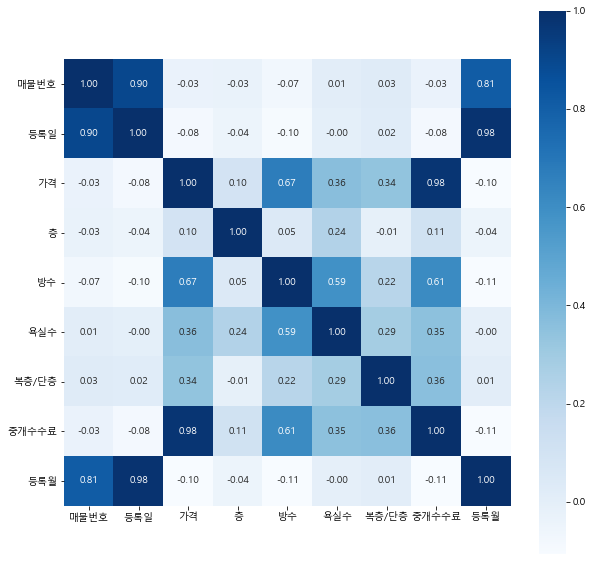

In [ ]:
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(data = data, x = '등록일', y = '가격', hue = '동', palette = 'Blues')
plt.subplot(122)
sns.boxplot(data = data, x = '등록월', y = '가격', hue = '동', palette = 'Blues')
plt.show()
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

data = pd.read_excel('data.xlsx', sheet_name = 'all')
data = data.dropna(axis = 1)
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True, fmt='.2f', square = True, cmap = 'Blues')
plt.show()

가격과 중개수수료는 0.98로 상관관계가 높다.<br>
따라서 둘 다 가격에 대한 속성을 가지고 있으므로 한 가지만 사용한다.<br>
방수와 가격은 0.67로 상관관계가 있다고 볼 수 있다.<br>
등록월과 등록일은 가격과 상관관계가 없다.<br>

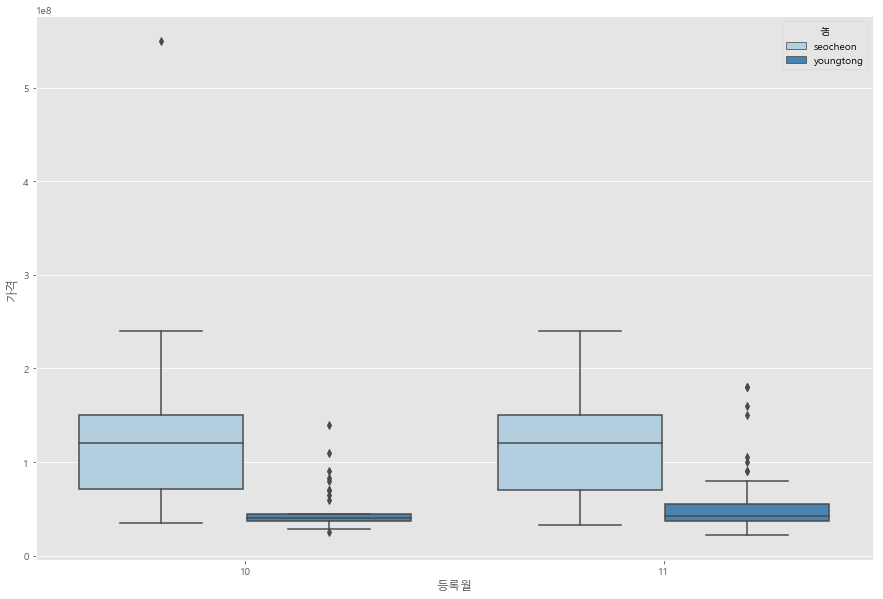

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(15,10))
sns.boxplot(data = data, x = '등록월', y = '가격', hue = '동', palette = 'Blues')
plt.show()

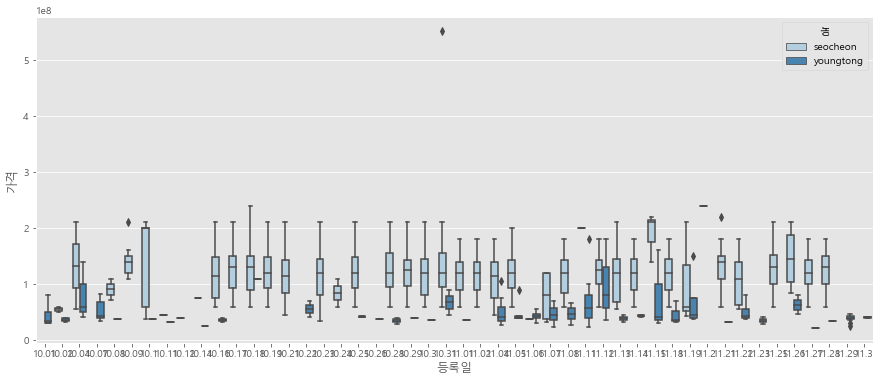

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data = data, x = '등록일', y = '가격', hue = '동', palette = 'Blues')
plt.show()

등록일은 그래프가 촘촘하기 때문에 등록월을 이용한다.

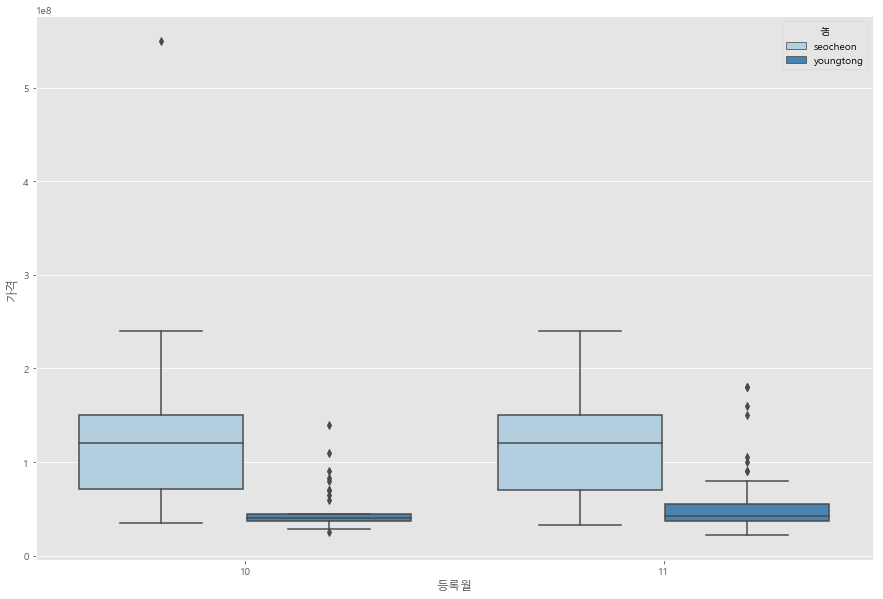

In [ ]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = data, x = '등록월', y = '가격', hue = '동', palette = 'Blues')
plt.show()

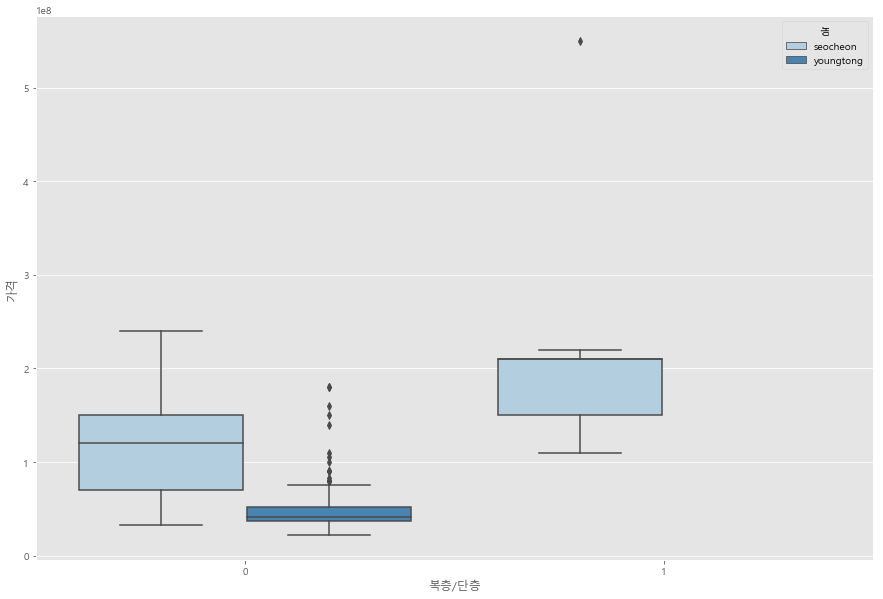

In [ ]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = data, x = '복층/단층', y = '가격', hue = '동', palette = 'Blues')
plt.show()

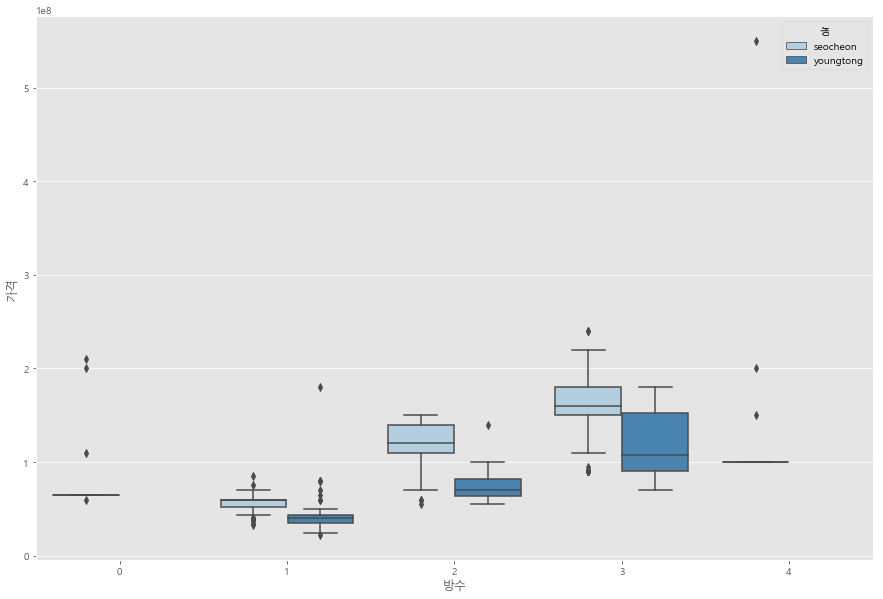

In [ ]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = data, x = '방수', y = '가격', hue = '동', palette = 'Blues')
plt.show()

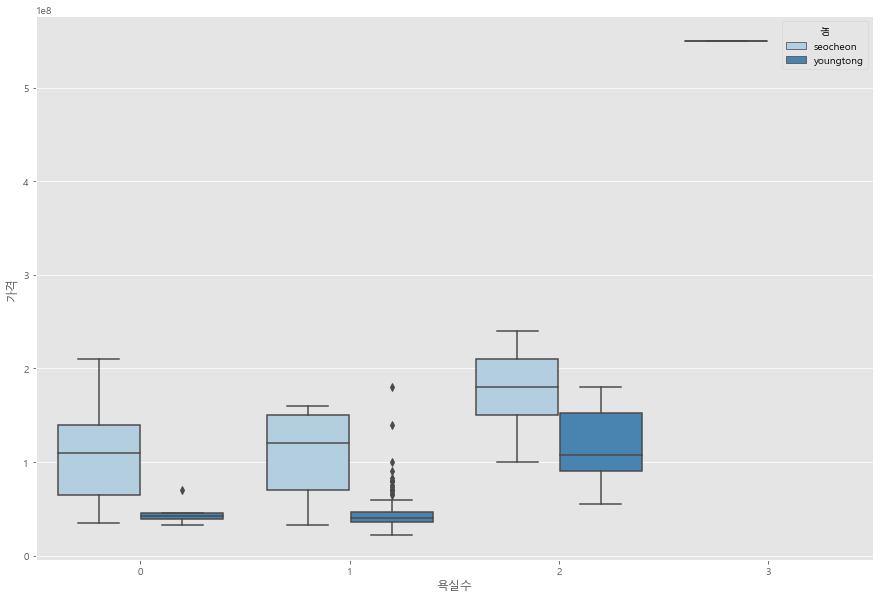

In [ ]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = data, x = '욕실수', y = '가격', hue = '동', palette = 'Blues')
plt.show()

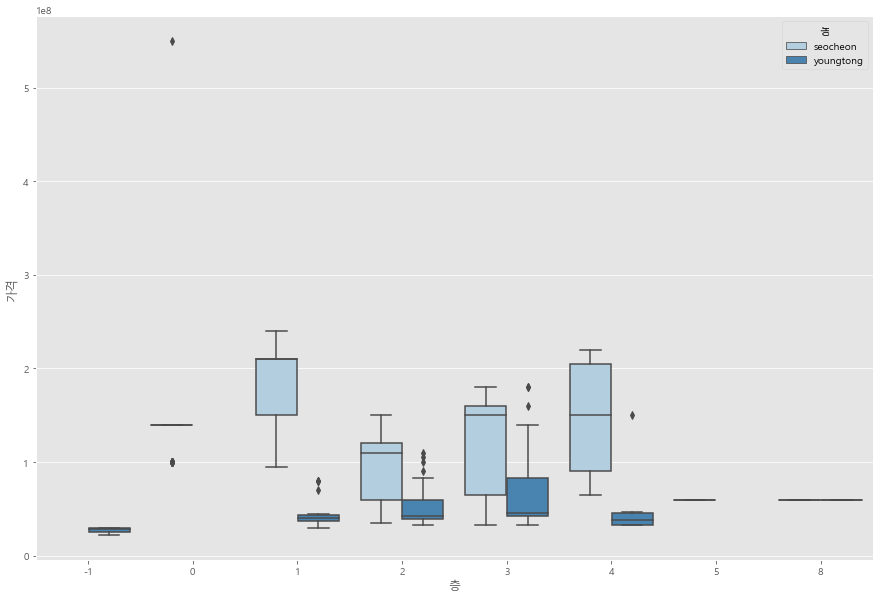

In [ ]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = data, x = '층', y = '가격', hue = '동', palette = 'Blues')
plt.show()

서천이 영통보다 가격이 비싼 편이다.<br>
등록월은 가격과 연관 관계가 거의 없다고 볼 수 있다.<br>
1층 가격이 가장 비싸고 나머지는 고층일수록 비싸며 지하층이 가장 싸다.<br>
복층이 단층보다 가격이 비싸다고 볼 수 있다.<br>
방수와 욕실수가 많을수록 가격이 비싸다고 볼 수 있다.

In [ ]:
import pandas as pd

df = pd.read_excel('data.xlsx', sheet_name = 'all')
# seocheon: 0, youngtong: 1  /  lease:0, monthly:1
for i in range(len(df)):
    if (df.iloc[i,0] == 'seocheon'):
        df.iloc[i,0] = 0
    else:
        df.iloc[i,0] = 1
        
    if (df.iloc[i,9] == 'lease'):
        df.iloc[i,9] = 0
    else:
        df.iloc[i,9] = 1

In [ ]:
df.head()

,동,매물번호,등록일,가격,층,방수,욕실수,복층/단층,중개수수료,임대,등록월,월세,보증금
0,0,260546729,11.28,150000000,3,3,2,0,450000,0,11,NaN,NaN
1,0,260546728,11.28,180000000,3,3,2,0,540000,0,11,NaN,NaN
2,0,260546727,11.28,160000000,3,3,1,0,480000,0,11,NaN,NaN
3,0,260546724,11.28,140000000,0,2,0,0,420000,0,11,NaN,NaN
4,0,260546723,11.28,140000000,0,2,0,0,420000,0,11,NaN,NaN


**1. K-NN**

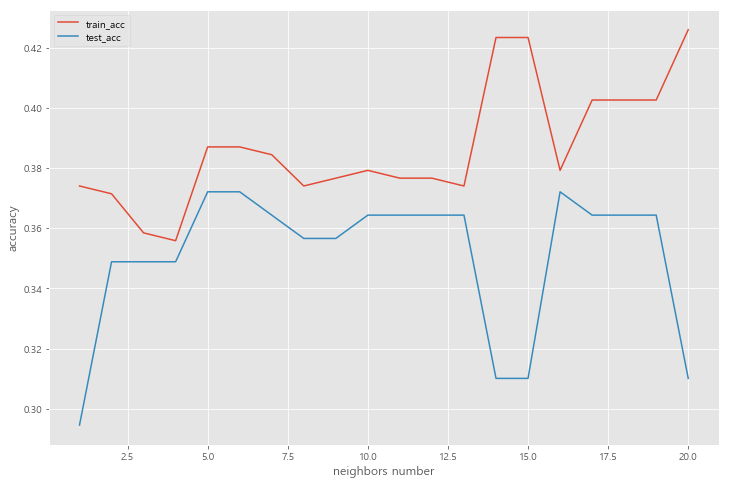

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = df[['동', '임대', '방수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

training_acc = []
test_acc = []

neighbors = range(1, 21)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.figure(figsize = (12, 8))
plt.plot(neighbors, training_acc, label = 'train_acc')
plt.plot(neighbors, test_acc, label = 'test.acc')
plt.ylabel("accuracy")
plt.xlabel("neighbors number")
plt.legend(['train_acc', 'test_acc'])

이웃 수가 15, 20일 때 over-fitting 되는 것을 알 수 있다.<br>
이웃 수가 5일 때 최적 모델이다.

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print("k-NN test set prediction: {}".format(clf.predict(X_test)))
print("k-NN test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

k-NN test set prediction: [100000000 120000000  38000000 120000000 100000000 120000000 120000000
 120000000 180000000 100000000 180000000 120000000  30000000 180000000
  38000000  60000000  38000000  38000000 120000000  60000000  90000000
  30000000  30000000  58000000  60000000 120000000  38000000  60000000
 120000000 120000000 120000000  70000000 180000000  38000000  38000000
  58000000  70000000 180000000  38000000  65000000 120000000  38000000
  70000000 120000000  90000000 180000000 180000000  60000000  70000000
  38000000 120000000 120000000 120000000 180000000 180000000  90000000
  60000000 120000000 120000000  58000000 100000000 120000000  38000000
 120000000 120000000  60000000  60000000  90000000 180000000  30000000
  38000000  38000000  38000000 120000000 120000000 120000000 120000000
  38000000  60000000 120000000  38000000  38000000  60000000  90000000
  65000000 120000000 120000000 120000000 120000000 120000000 120000000
  60000000 120000000 120000000  65000000  58000000 

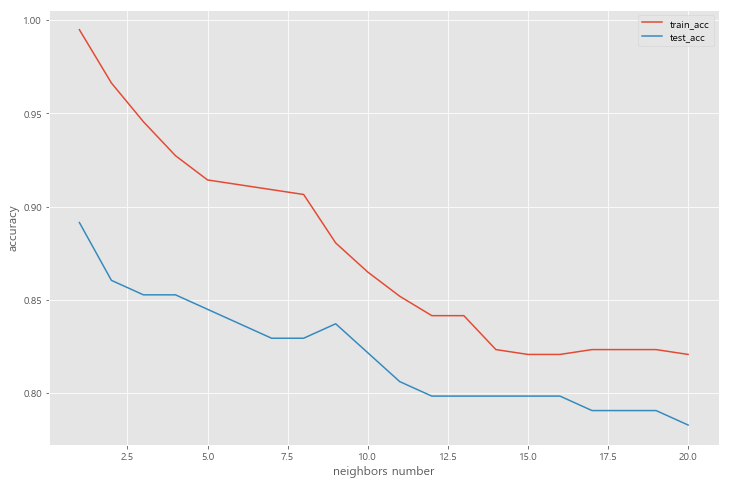

In [ ]:
X = df[['동', '임대', '방수', '중개수수료']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

training_acc = []
test_acc = []

neighbors = range(1, 21)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.figure(figsize = (12, 8))
plt.plot(neighbors, training_acc, label = 'train_acc')
plt.plot(neighbors, test_acc, label = 'test.acc')
plt.ylabel("accuracy")
plt.xlabel("neighbors number")
plt.legend(['train_acc', 'test_acc'])

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 9)
clf.fit(X_train, y_train)
print("k-NN test set prediction: {}".format(clf.predict(X_test)))
print("k-NN test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

k-NN test set prediction: [100000000 120000000  45000000 110000000 210000000 110000000 150000000
 140000000 150000000 100000000 160000000 120000000 180000000 150000000
  45000000  60000000  40000000  42000000 140000000  55000000  90000000
  90000000  60000000  90000000  60000000 120000000  38000000  55000000
 120000000 150000000 140000000  90000000 210000000  40000000  45000000
  90000000  70000000 160000000  43000000  65000000 140000000  24000000
  90000000 140000000  90000000 210000000 210000000  60000000  60000000
  35000000 140000000 140000000 150000000 180000000 180000000 110000000
  60000000 120000000 140000000  65000000 100000000 140000000  33000000
 120000000 120000000  38000000  45000000  90000000 180000000  70000000
  40000000  33000000  33000000 110000000 140000000 120000000 120000000
  33000000  60000000 110000000  33000000  42000000  55000000 110000000
 210000000 140000000 120000000 120000000 120000000 150000000 150000000
  38000000 120000000 120000000  65000000  90000000 

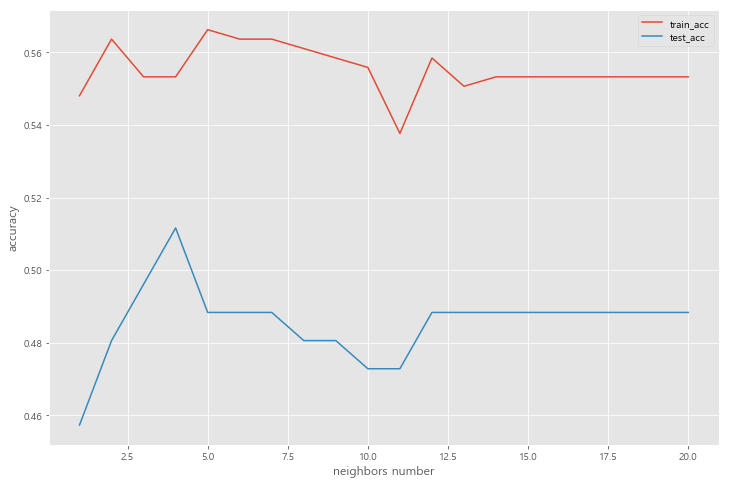

In [ ]:
X = df[['동', '임대', '방수', '욕실수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

training_acc = []
test_acc = []

neighbors = range(1, 21)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(neighbors, training_acc, label = 'train_acc')
plt.plot(neighbors, test_acc, label = 'test.acc')
plt.ylabel("accuracy")
plt.xlabel("neighbors number")
plt.legend(['train_acc', 'test_acc'])

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
print("k-NN test set prediction: {}".format(clf.predict(X_test)))
print("k-NN test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

k-NN test set prediction: [100000000 120000000  35000000 140000000 150000000 140000000 120000000
 140000000 180000000 100000000 160000000 120000000  30000000 180000000
  35000000  60000000  35000000  35000000 140000000  60000000  90000000
  30000000  30000000  58000000  60000000 120000000  35000000  60000000
 120000000 120000000 140000000  70000000 180000000  35000000  33000000
  58000000  70000000 160000000  35000000  65000000 140000000  35000000
  90000000 140000000  90000000 180000000 180000000  60000000  70000000
  35000000 140000000 140000000 120000000 180000000 180000000 110000000
  60000000 120000000 120000000  58000000 100000000 140000000  35000000
 120000000 120000000  60000000  60000000  90000000 180000000  37000000
  35000000  35000000  35000000 140000000 140000000 120000000 120000000
  35000000  60000000 140000000  35000000  33000000  60000000 110000000
  65000000 140000000 120000000 120000000 120000000 120000000 120000000
  60000000 120000000 120000000  65000000  58000000 

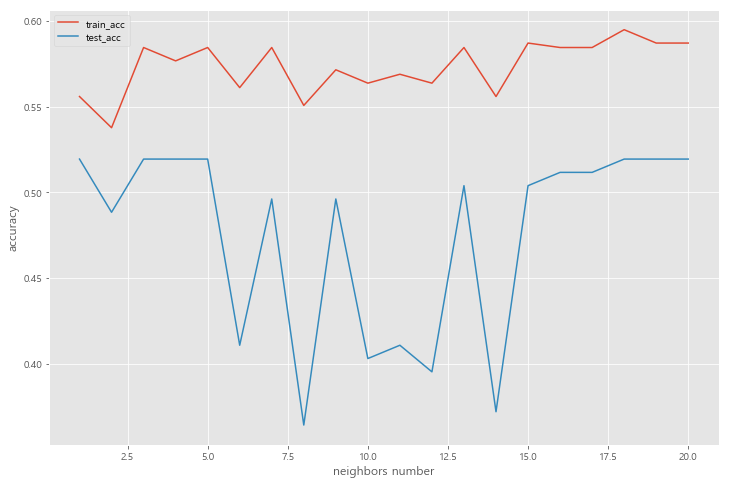

In [ ]:
X = df[['동', '임대', '방수', '층']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

training_acc = []
test_acc = []

neighbors = range(1, 21)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(neighbors, training_acc, label = 'train_acc')
plt.plot(neighbors, test_acc, label = 'test.acc')
plt.ylabel("accuracy")
plt.xlabel("neighbors number")
plt.legend(['train_acc', 'test_acc'])

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y_train)
print("k-NN test set prediction: {}".format(clf.predict(X_test)))
print("k-NN test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

k-NN test set prediction: [100000000 120000000  35000000 120000000 210000000 120000000 150000000
 140000000 160000000 100000000 160000000 120000000  45000000 160000000
  42000000  60000000  35000000  35000000 140000000  60000000  90000000
  37000000  35000000  55000000  60000000 120000000  33000000  60000000
 120000000 150000000 140000000  70000000 210000000  35000000  42000000
  42000000  70000000 160000000  35000000  65000000 140000000  25000000
  70000000 140000000  90000000 210000000 210000000  60000000  55000000
  35000000 140000000 140000000 120000000 160000000 160000000 210000000
  60000000 120000000 120000000  55000000 100000000 140000000  35000000
 120000000 120000000  60000000  60000000  90000000 160000000  37000000
  35000000  33000000  25000000 120000000 140000000 120000000 120000000
  25000000  65000000 120000000  33000000  35000000  60000000  90000000
  37000000 140000000 120000000 120000000 120000000 150000000 150000000
  60000000 120000000 120000000  65000000  55000000 

중개수수료를 attribute에 추가하면 모델 성능이 좋아진다는 것을 알 수 있다.

**2. Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['동', '임대', '방수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression(fit_intercept=True, normalize = True, n_jobs = None)
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print("Lineaer Regression test set accuracy:", accuracy)

Lineaer Regression test set accuracy: 0.7766021964002651


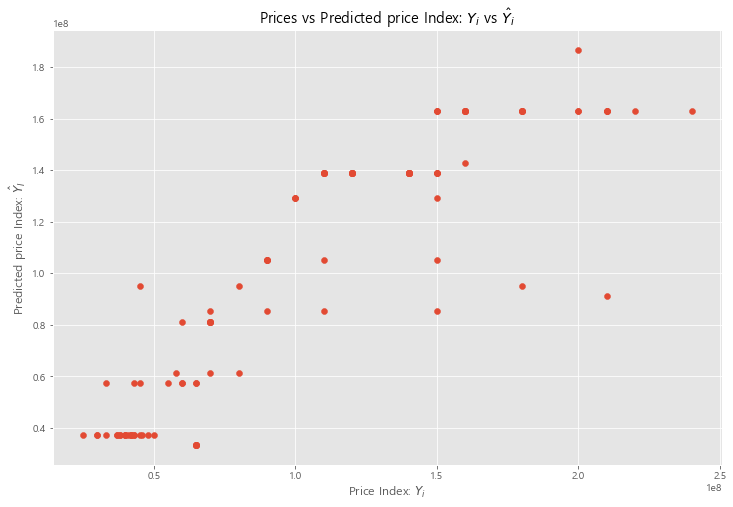

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = lr.predict(X_test)

plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_I$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
X = df[['동', '임대', '방수', '중개수수료']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression(fit_intercept=True, normalize = True, n_jobs = None)
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print("Lineaer Regression test set accuracy:", accuracy)

Lineaer Regression test set accuracy: 0.9796675035453541


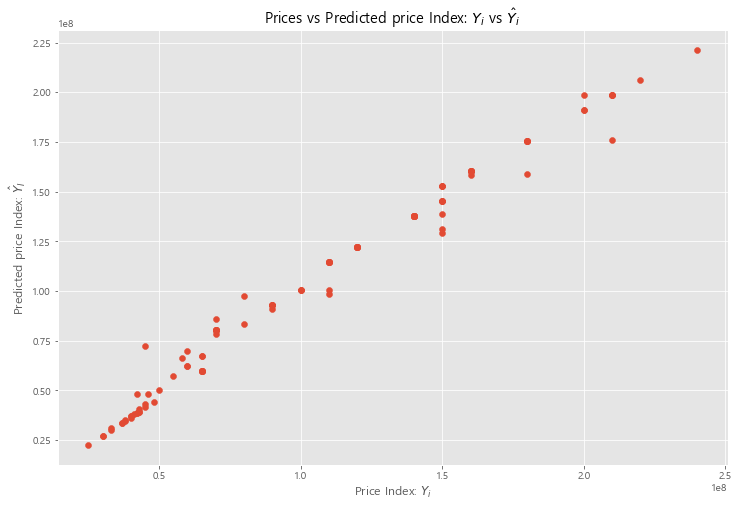

In [ ]:
y_pred = lr.predict(X_test)

plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_I$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
X = df[['동', '임대', '방수', '욕실수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression(fit_intercept=True, normalize = True, n_jobs = None)
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print("Lineaer Regression test set accuracy:", accuracy)

Lineaer Regression test set accuracy: 0.8080716720843452


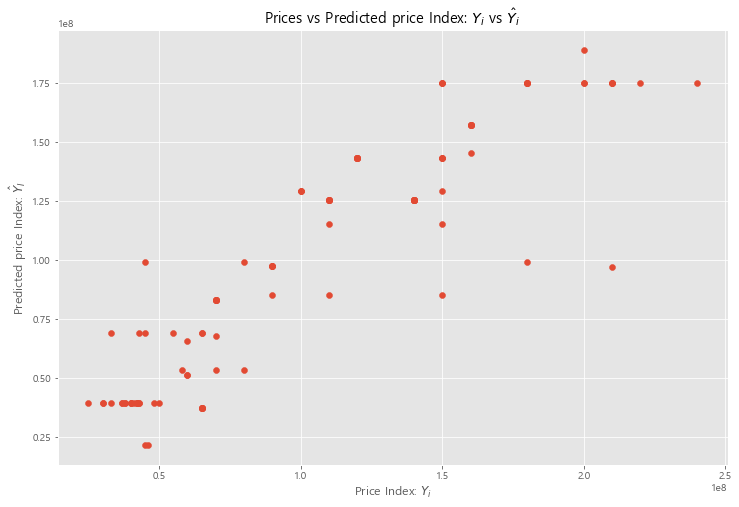

In [ ]:
y_pred = lr.predict(X_test)

plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_I$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
X = df[['동', '임대', '방수', '층']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression(fit_intercept=True, normalize = True, n_jobs = None)
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print("Lineaer Regression test set accuracy:", accuracy)

Lineaer Regression test set accuracy: 0.7834198212647479


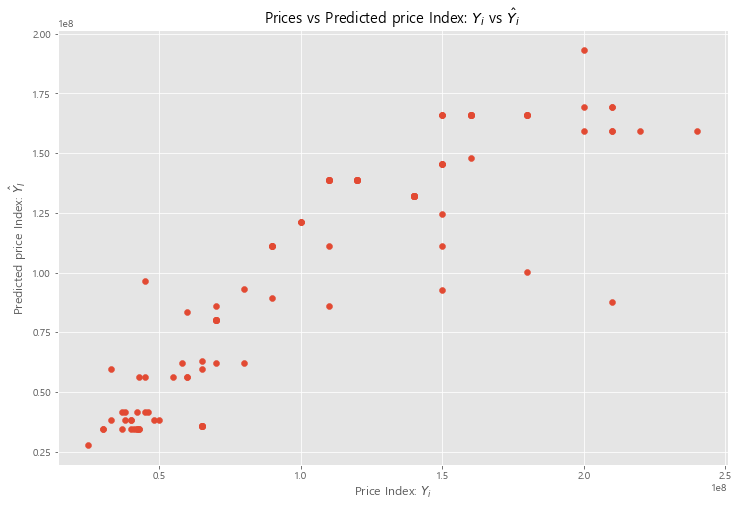

In [ ]:
y_pred = lr.predict(X_test)

plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_I$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Linear Regression도 중개수수료를 추가할 때 모델 성능이 좋아진다는 것을 알 수 있다.

In [ ]:
new_pred = lr.predict([[0,1,1,200000]])
new_pred

array([6.84301361e+11])

**3. DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df[['동', '임대', '방수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 0.434
test set accuracy: 0.395


In [ ]:
X = df[['동', '임대', '방수', '중개수수료']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 0.987
test set accuracy: 0.961


In [ ]:
X = df[['동', '임대', '방수', '욕실수']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 0.600
test set accuracy: 0.535


In [ ]:
X = df[['동', '임대', '방수', '층']]
y = df['가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

training set accuracy: 0.647
test set accuracy: 0.543
